<a href="https://colab.research.google.com/github/hanwo-ol/python_202601_lecture/blob/main/Day09_15_seaborn3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 보석 유통 및 가치 평가 실무: 데이터 기반 의사결정

보석 소매업자 및 세공 전문가의 관점에서 데이터를 분석하여 소비자에게는 가격의 정당성을 부여하고, 생산자(공급처)와는 합리적인 거래 기준을 수립하기 위한 고급 EDA 과정을 수행합니다.

|변수명 (Variable)|설명 (Description)|상세 내용 / 범위|
|-|-|-|
|price|가격 (US Dollar)|`$326 ~ $18,823`|
|carat|무게 (Carat)|0.2 ~ 5.01|
|cut|연마 품질|Fair (나쁨) ~ Ideal (최상)|
|color|색상 등급|D (최상) ~ J (나쁨)|
|clarity|투명도|I1 (나쁨) ~ IF (최상)|
|x|길이 (mm)|가로 길이|
|y|폭 (mm)|세로 길이|
|z|깊이 (mm)|높이|
|depth|깊이 비율 (%)|$\dfrac{2z}{x+y}$ /(43~79)|
|table|테이블 너비 (%)|상단 면의 상대적 너비 /(43~95)|

## 1. 소비자 신뢰 확보: 가격 결정 요인의 객관화
소비자는 단순히 비싼 보석이 아니라, 왜 이 가격이 책정되었는지에 대한 전문적인 근거를 원합니다. 무게(Carat) 대비 가격의 효율성을 분석하여 '가성비' 구간과 '프리미엄' 구간을 구분합니다.

### 1.1 캐럿당 가격(Price per Carat) 분석
단순 가격이 아닌 무게 대비 가치를 산출하여 세공 등급(Cut)이 실제 가치에 미치는 영향을 증명합니다.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

diamonds = sns.load_dataset('diamonds')

In [3]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
# 캐럿당 가격 파생 변수 생성
diamonds['price_per_carat'] = diamonds['price'] / diamonds['carat']



In [5]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,price_per_carat
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,1417.391304
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,1552.380952
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1421.739130
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,1151.724138
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1080.645161
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,3829.166667
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,3829.166667
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3938.571429
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3205.813953


/tmp/ipython-input-2277415874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=diamonds, x='cut', y='price_per_carat', palette='viridis')


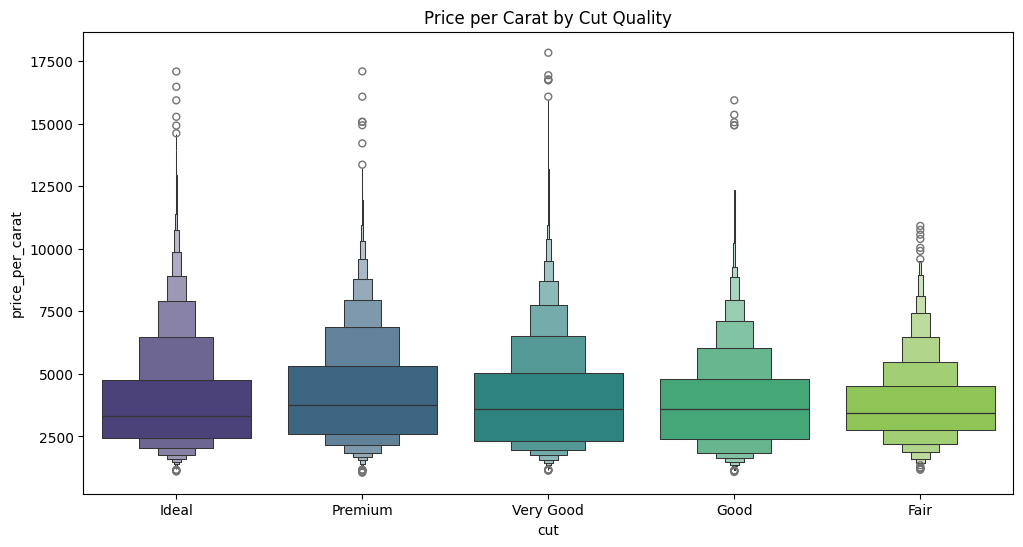

In [6]:
# 세공 등급별 캐럿당 가격 분포 시각화
plt.figure(figsize=(12, 6))
sns.boxenplot(data=diamonds, x='cut', y='price_per_carat', palette='viridis')
plt.title('Price per Carat by Cut Quality')
plt.show()


In [7]:
# 통계적 요약
cut_stats = diamonds.groupby('cut')['price_per_carat'].agg(['mean', 'median', 'std'])
(cut_stats)


/tmp/ipython-input-1520646435.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cut_stats = diamonds.groupby('cut')['price_per_carat'].agg(['mean', 'median', 'std'])


,mean,median,std
cut,,,
Ideal,3919.699825,3307.142857,2043.337093
Premium,4222.905374,3763.333333,2035.397875
Very Good,4014.128366,3605.825792,2037.420705
Good,3860.027680,3613.250000,1829.543624
Fair,3767.255681,3449.444444,1540.396997


## 2. 전문성 강조: 기술적 규격(Depth & Table)의 최적 범위 도출
보석의 광채를 결정하는 것은 물리적 비율입니다. 소비자에게 "이 보석은 가장 이상적인 비율(Depth 60-63%) 내에 존재한다"는 것을 수치로 제시합니다.

### 2.1 이상적 비율과 세공 등급의 상관관계
`Ideal` 등급의 보석들이 가지는 물리적 특징을 분석하여 판매 시 전문 상담 자료로 활용합니다.

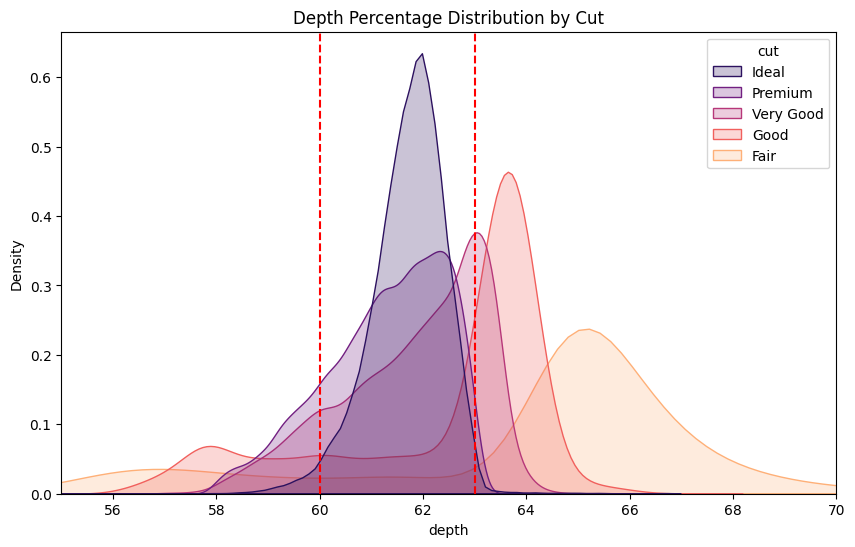

In [10]:
# Ideal 등급과 나머지 등급의 물리적 비율 비교
plt.figure(figsize=(10, 6))
sns.kdeplot(data=diamonds, x='depth', hue='cut', fill=True, common_norm=False, palette='magma')
plt.axvline(60, color='red', linestyle='--') # 이상적 범위 하한선
plt.axvline(63, color='red', linestyle='--') # 이상적 범위 상한선
plt.title('Depth Percentage Distribution by Cut')
plt.xlim(55, 70)
plt.show()


## 3. 생산자 협상 전략: 부피(Volume) 기반 가치 평가
생산자로부터 원석을 매입할 때, 단순히 캐럿(무게)만 보는 것이 아니라 실제 부피와 형태의 무결성을 따져야 합니다. 무게에 비해 부피가 비정상적으로 크거나 작은 '비효율적 원석'을 찾아내어 협상 우위를 점합니다.

### 3.1 부피 계산 및 밀도 분석
보석의 가로(x), 세로(y), 높이(z)를 이용해 부피를 계산하고 캐럿과의 상관관계를 분석합니다.


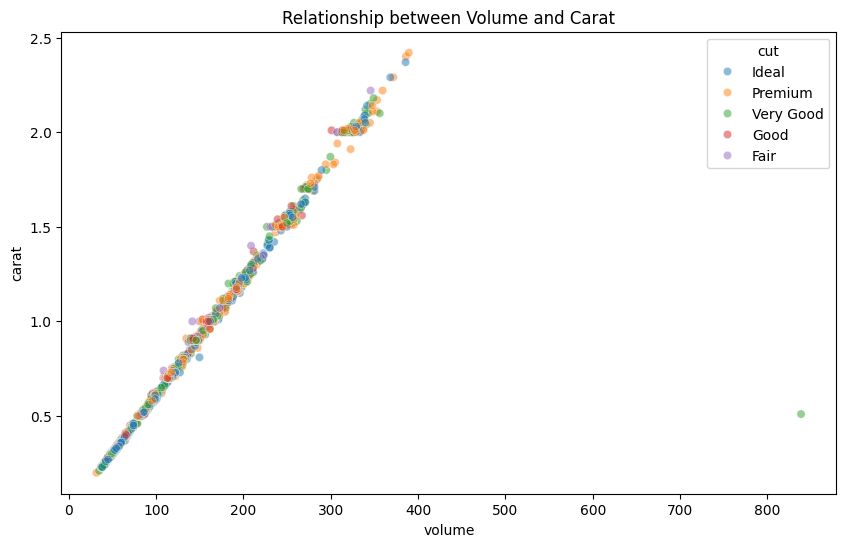

In [11]:
# 부피 계산 (0인 값은 결측치로 간주하여 제외)
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']
df_clean = diamonds[diamonds['volume'] > 0].copy()

# 부피와 캐럿의 관계 분석 (선형성 확인)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean.sample(2000), x='volume', y='carat', hue='cut', alpha=0.5)
plt.title('Relationship between Volume and Carat')
plt.show()

In [12]:
# 부피 대비 가격의 이상치 탐지 (협상 대상 식별)
# 무게에 비해 부피가 너무 커서 세공 시 손실이 클 것으로 예상되는 그룹
df_clean['vol_per_carat'] = df_clean['volume'] / df_clean['carat']
potential_issues = df_clean.nlargest(10, 'vol_per_carat')
(potential_issues[['carat', 'cut', 'vol_per_carat', 'price']])

,carat,cut,vol_per_carat,price
24067,2.00,Premium,1920.299030,12210
48410,0.51,Very Good,1644.122353,1970
49189,0.51,Ideal,1644.122353,2075
41019,0.25,Premium,351.217152,1186
41020,0.25,Premium,351.217152,1186
36651,0.35,Premium,322.529040,949
36652,0.35,Premium,322.529040,949
43424,0.35,Fair,322.101960,1415
43425,0.35,Fair,322.101960,1415
34282,0.39,Premium,309.094585,468


## 4. 다차원 시장 포지셔닝: 컬러와 투명도의 조합 분석
공급처에서 특정 컬러나 투명도 조합을 대량 매입할 때, 시장에서 가장 수요가 높거나 희소성이 있는 구간을 파악합니다.

### 4.1 Heatmap을 이용한 희소 가치 구간 식별
어떤 컬러(Color)와 투명도(Clarity) 조합이 가장 높은 평균 가격을 형성하는지 분석합니다.

/tmp/ipython-input-1143100006.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_market = diamonds.pivot_table(


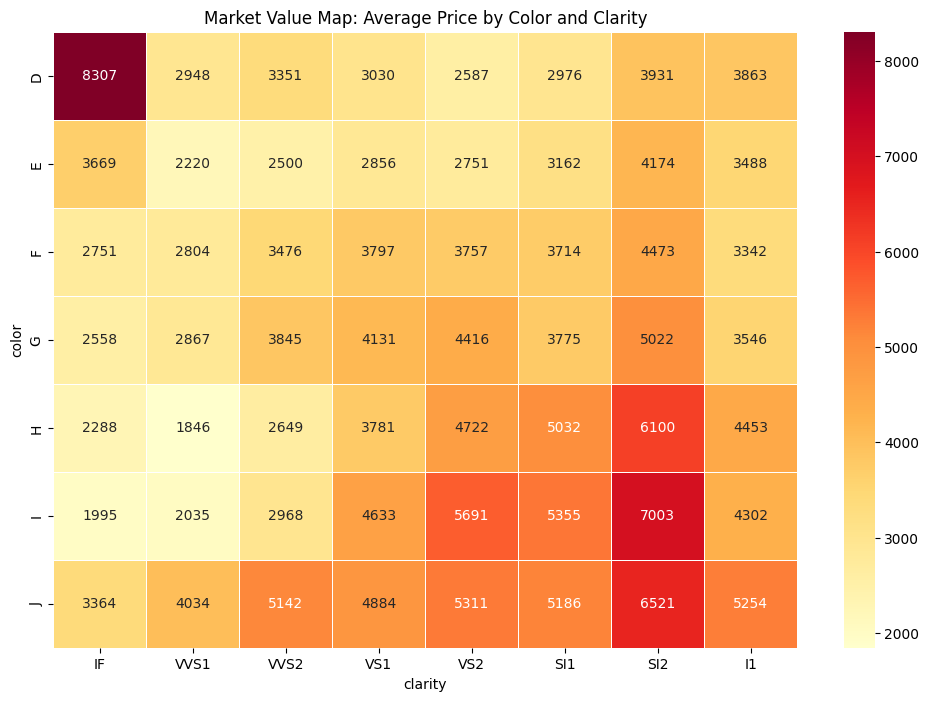

In [13]:
# 컬러와 투명도에 따른 평균 가격 피벗 테이블
pivot_market = diamonds.pivot_table(
    index='color',
    columns='clarity',
    values='price',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_market, annot=True, fmt='.0f', cmap='YlOrRd', linewidths=.5)
plt.title('Market Value Map: Average Price by Color and Clarity')
plt.show()


## 5. 수익 최적화: 가격 변동성 및 리스크 관리
특정 조건에서 가격의 표준편차가 크다면, 이는 시장 가격이 불안정하거나 세공사의 역량에 따라 가치가 급변함을 의미합니다. 매입 리스크를 줄이기 위해 변동성을 분석합니다.

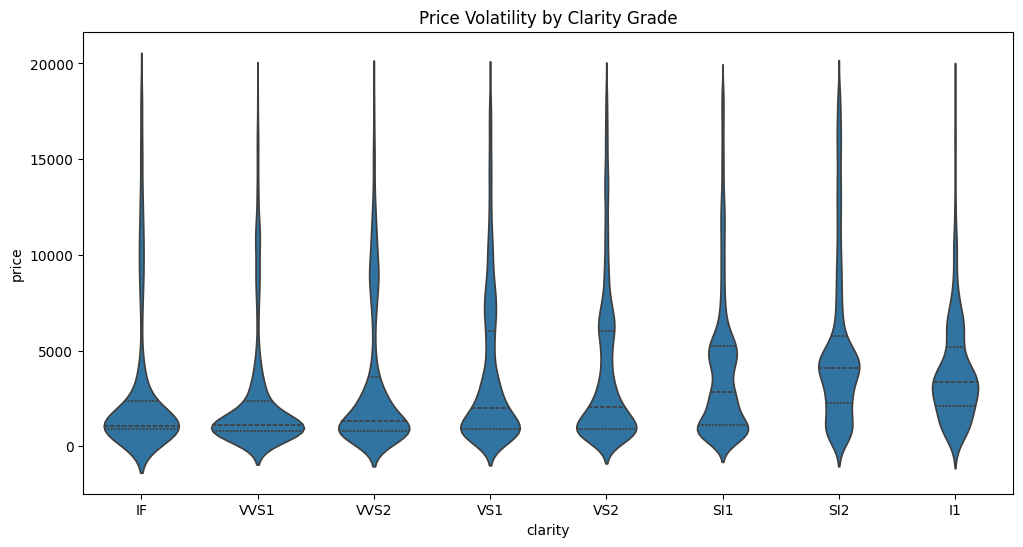

In [14]:
# 투명도 등급별 가격 변동성(표준편차) 분석
plt.figure(figsize=(12, 6))
sns.violinplot(data=diamonds, x='clarity', y='price', inner='quartile')
plt.title('Price Volatility by Clarity Grade')
plt.show()


In [15]:
# 변동 계수(Coefficient of Variation) 산출: (표준편차 / 평균)
cv_analysis = diamonds.groupby('clarity')['price'].agg(lambda x: x.std() / x.mean()).sort_values()
print("Price Volatility Index (Lower is more stable):")
(cv_analysis)


Price Volatility Index (Lower is more stable):


/tmp/ipython-input-3585640444.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cv_analysis = diamonds.groupby('clarity')['price'].agg(lambda x: x.std() / x.mean()).sort_values()


,price
clarity,
I1,0.715254
SI2,0.841484
SI1,0.950822
VS2,1.029889
VS1,1.044874
VVS2,1.163810
VVS1,1.321715
IF,1.368401


## 요약: 비즈니스 인사이트 적용
1. **소비자 대응**: `price_per_carat`과 `depth` 분포 데이터를 제시하여 가격의 객관적 근거와 제품의 기술적 우수성을 홍보합니다.
2. **생산자 협상**: `vol_per_carat` 지표를 활용하여 물리적 규격이 불량한 원석의 단가 인하를 요구합니다.
3. **재고 전략**: `Heatmap` 분석을 통해 평균 가격이 높고 수요가 안정적인 `Color-Clarity` 조합을 우선적으로 매입합니다.
4. **리스크 관리**: 변동 계수가 높은 등급은 정밀한 감정 후 매입하고, 변동 계수가 낮은 등급은 표준 가격으로 빠르게 회전시킵니다.